In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pln
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
pd.set_option('max_columns', None)
df = pd.read_csv("../../input/fifa-18-demo-player-dataset/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

## Multivariate scatter plots

<Figure size 864x576 with 0 Axes>

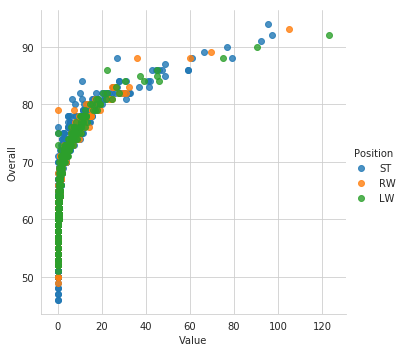

In [4]:
_ = sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

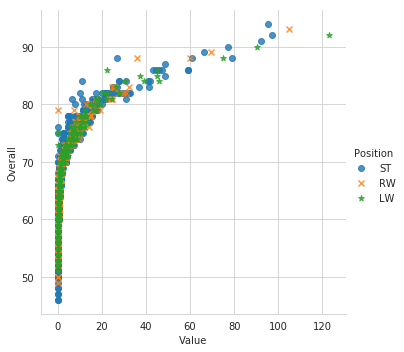

In [6]:
_ = sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position',
               data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
               fit_reg=False)

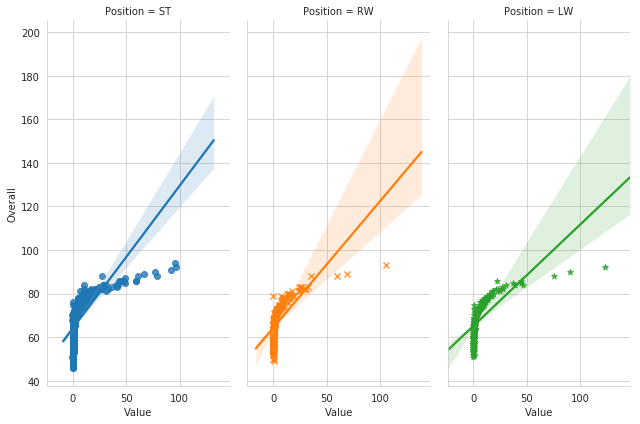

In [12]:
_ = sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position', col='Position',
               data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
               height=6, aspect=.5, x_jitter=.5,)

## Grouped box plot

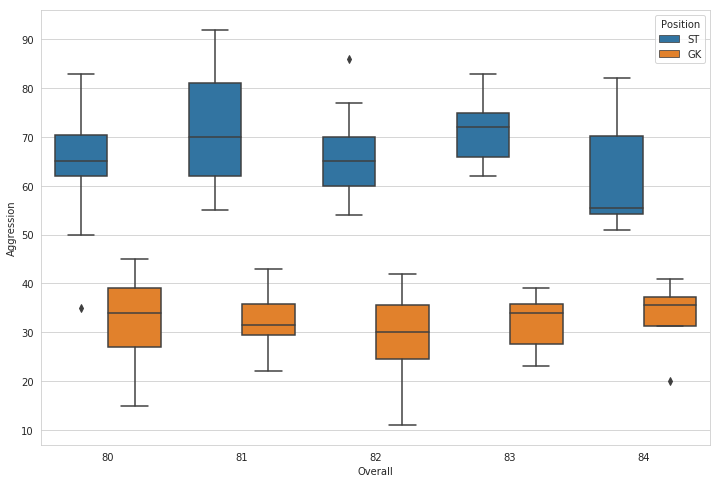

In [8]:
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

plt.figure(figsize=(12, 8))
_ = sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

## Summarization

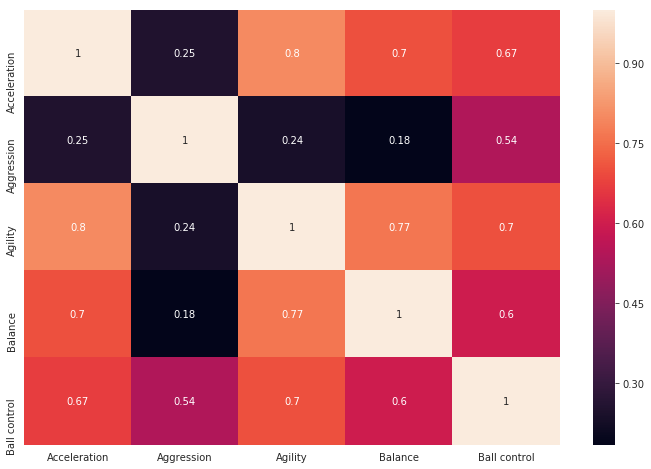

In [14]:
f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

plt.figure(figsize=(12, 8))
_ = sns.heatmap(f, annot=True)

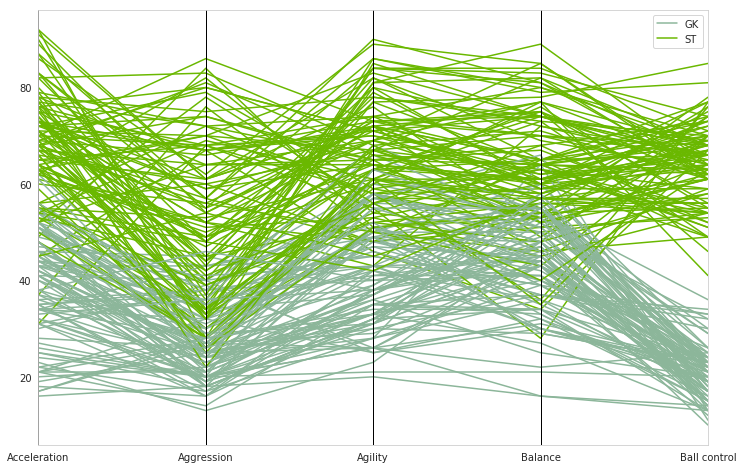

In [16]:
from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

plt.figure(figsize=(12, 8))
_ = parallel_coordinates(f, 'Position')